In [1]:
!pip install matplotlib

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 15)

In [4]:
data=pd.read_csv(r'extended_healthcare_dataset_10000_rows.csv')

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,60957,Male,45.0,0,0,Yes,Private,Rural,73.01,24.8,formerly smoked,0
9996,16812,Female,82.0,0,1,Yes,Self-employed,Rural,229.58,23.7,Unknown,0
9997,4148,Male,81.0,0,0,Yes,Self-employed,Urban,71.18,23.9,formerly smoked,0
9998,46875,Male,35.0,0,0,Yes,Private,Urban,145.23,32.3,never smoked,0


Exploratory Data Analysis

In [6]:
data.shape

(10000, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   gender             10000 non-null  object 
 2   age                10000 non-null  float64
 3   hypertension       10000 non-null  int64  
 4   heart_disease      10000 non-null  int64  
 5   ever_married       10000 non-null  object 
 6   work_type          10000 non-null  object 
 7   Residence_type     10000 non-null  object 
 8   avg_glucose_level  10000 non-null  float64
 9   bmi                9598 non-null   float64
 10  smoking_status     10000 non-null  object 
 11  stroke             10000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 937.6+ KB


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  402
smoking_status         0
stroke                 0
dtype: int64

Lets Count Values

In [9]:
data['bmi'].value_counts()

bmi
25.5    82
23.4    81
28.4    81
27.7    78
26.9    78
        ..
52.3     1
71.9     1
52.9     1
44.1     1
54.3     1
Name: count, Length: 418, dtype: int64

In [10]:

data['bmi'].describe()

count    9598.000000
mean       28.883101
std         7.774750
min        10.300000
25%        23.600000
50%        28.000000
75%        33.000000
max        97.600000
Name: bmi, dtype: float64

In [11]:

data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [12]:
data['bmi'].describe()

count    10000.000000
mean        28.883101
std          7.616859
min         10.300000
25%         23.800000
50%         28.400000
75%         32.700000
max         97.600000
Name: bmi, dtype: float64

In [13]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data.drop('id',axis=1,inplace=True)

In [15]:

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.883101,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,45.0,0,0,Yes,Private,Rural,73.01,24.800000,formerly smoked,0
9996,Female,82.0,0,1,Yes,Self-employed,Rural,229.58,23.700000,Unknown,0
9997,Male,81.0,0,0,Yes,Self-employed,Urban,71.18,23.900000,formerly smoked,0
9998,Male,35.0,0,0,Yes,Private,Urban,145.23,32.300000,never smoked,0


Outlier Removation

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

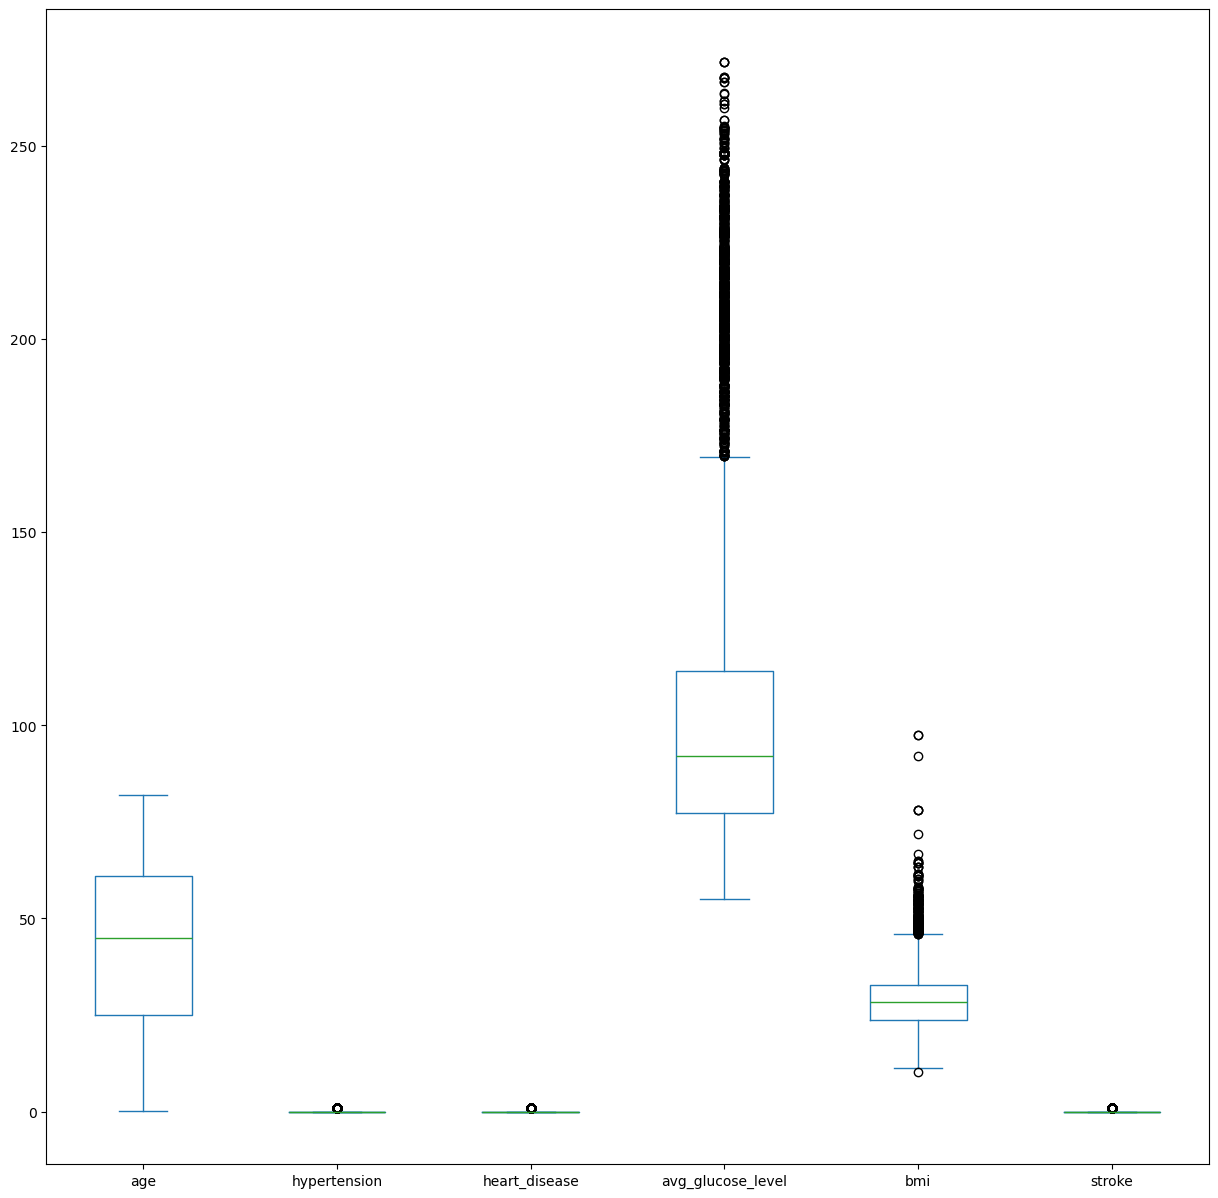

In [19]:
data.plot(kind='box')
plt.show()

Label Encoding

In [20]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.883101,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [21]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [22]:
gender=enc.fit_transform(data['gender'])

In [23]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [24]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [25]:
data['work_type']=work_type

In [26]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [27]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.883101,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,45.0,0,0,1,2,0,73.01,24.800000,1,0
9996,0,82.0,0,1,1,3,0,229.58,23.700000,0,0
9997,1,81.0,0,0,1,3,1,71.18,23.900000,1,0
9998,1,35.0,0,0,1,2,1,145.23,32.300000,2,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             10000 non-null  int32  
 1   age                10000 non-null  float64
 2   hypertension       10000 non-null  int64  
 3   heart_disease      10000 non-null  int64  
 4   ever_married       10000 non-null  int32  
 5   work_type          10000 non-null  int32  
 6   Residence_type     10000 non-null  int32  
 7   avg_glucose_level  10000 non-null  float64
 8   bmi                10000 non-null  float64
 9   smoking_status     10000 non-null  int32  
 10  stroke             10000 non-null  int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 664.2 KB


Splitting the data for train and test

In [29]:
X=data.drop('stroke',axis=1)

In [30]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.883101,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [31]:
Y=data['stroke']

In [32]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: stroke, Length: 10000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [34]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
7496,0,51.0,0,0,1,2,1,95.70,24.8,1
7694,0,4.0,0,0,0,4,0,206.25,17.0,0
9248,1,50.0,0,0,1,2,1,103.51,35.9,2
2470,0,50.0,0,0,1,3,0,84.88,27.1,2
4392,0,7.0,0,0,0,4,0,63.98,23.0,0
...,...,...,...,...,...,...,...,...,...,...
9372,0,26.0,1,0,1,2,1,107.59,33.1,3
7291,0,43.0,0,0,1,2,1,86.67,33.3,2
1344,1,47.0,0,0,1,2,0,86.37,39.2,3
7293,1,19.0,0,0,0,2,0,95.18,24.9,3


In [35]:
Y_train

7496    0
7694    0
9248    0
2470    0
4392    0
       ..
9372    0
7291    0
1344    0
7293    0
1289    0
Name: stroke, Length: 8000, dtype: int64

In [36]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
937,1,19.0,0,0,0,2,0,142.57,22.8,0
9355,0,62.0,0,0,1,2,0,126.99,29.4,1
2293,1,66.0,0,0,1,2,1,247.48,33.5,3
192,1,59.0,0,0,1,3,0,118.03,35.5,3
8675,0,45.0,0,0,1,2,1,90.35,22.3,2
...,...,...,...,...,...,...,...,...,...,...
5624,0,46.0,0,0,1,0,1,56.89,23.8,3
6005,1,2.0,0,0,0,4,0,68.52,20.8,0
987,0,37.0,0,0,1,3,0,77.44,21.4,1
6152,1,22.0,0,0,0,2,0,86.53,20.8,2


In [37]:
Y_test

937     0
9355    0
2293    0
192     1
8675    0
       ..
5624    0
6005    0
987     0
6152    0
2092    0
Name: stroke, Length: 2000, dtype: int64

Normalise

In [38]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.41800,43.207300,0.097200,0.052500,0.657100,2.159000,0.513700,105.868672,28.883101,1.378600,0.047100
std,0.49366,22.462373,0.296245,0.223044,0.474702,1.090705,0.499837,44.958261,7.616859,1.073302,0.211863
min,0.00000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.00000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.255000,23.800000,0.000000,0.000000
50%,0.00000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.910000,28.400000,2.000000,0.000000
75%,1.00000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.160000,32.700000,2.000000,0.000000
max,2.00000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [39]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


In [40]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [44]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [45]:
dt.feature_importances_

array([0.03908738, 0.1939155 , 0.02814762, 0.02991336, 0.01482205,
       0.05355968, 0.03091423, 0.32507552, 0.22735869, 0.05720598])

In [46]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [47]:
Y_pred=dt.predict(X_test_std)

In [48]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [51]:
ac_dt

0.971

Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [54]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [55]:
Y_pred_lr=lr.predict(X_test_std)

In [56]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [58]:

ac_lr

0.945

KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [60]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [61]:
Y_pred=knn.predict(X_test_std)

In [62]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [63]:

ac_knn

0.942

Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [65]:

rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [66]:
Y_pred=rf.predict(X_test_std)

In [67]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [68]:
ac_rf

0.979

In [69]:

ac_knn

0.942

In [70]:
ac_dt

0.971

In [71]:
ac_lr

0.945

SVM

In [72]:
from sklearn.svm import SVC

In [73]:
sv=SVC()

In [74]:
sv.fit(X_train_std,Y_train)

SVC()

In [75]:
Y_pred=sv.predict(X_test_std)

In [76]:

ac_sv=accuracy_score(Y_test,Y_pred)

In [77]:
ac_sv

0.945

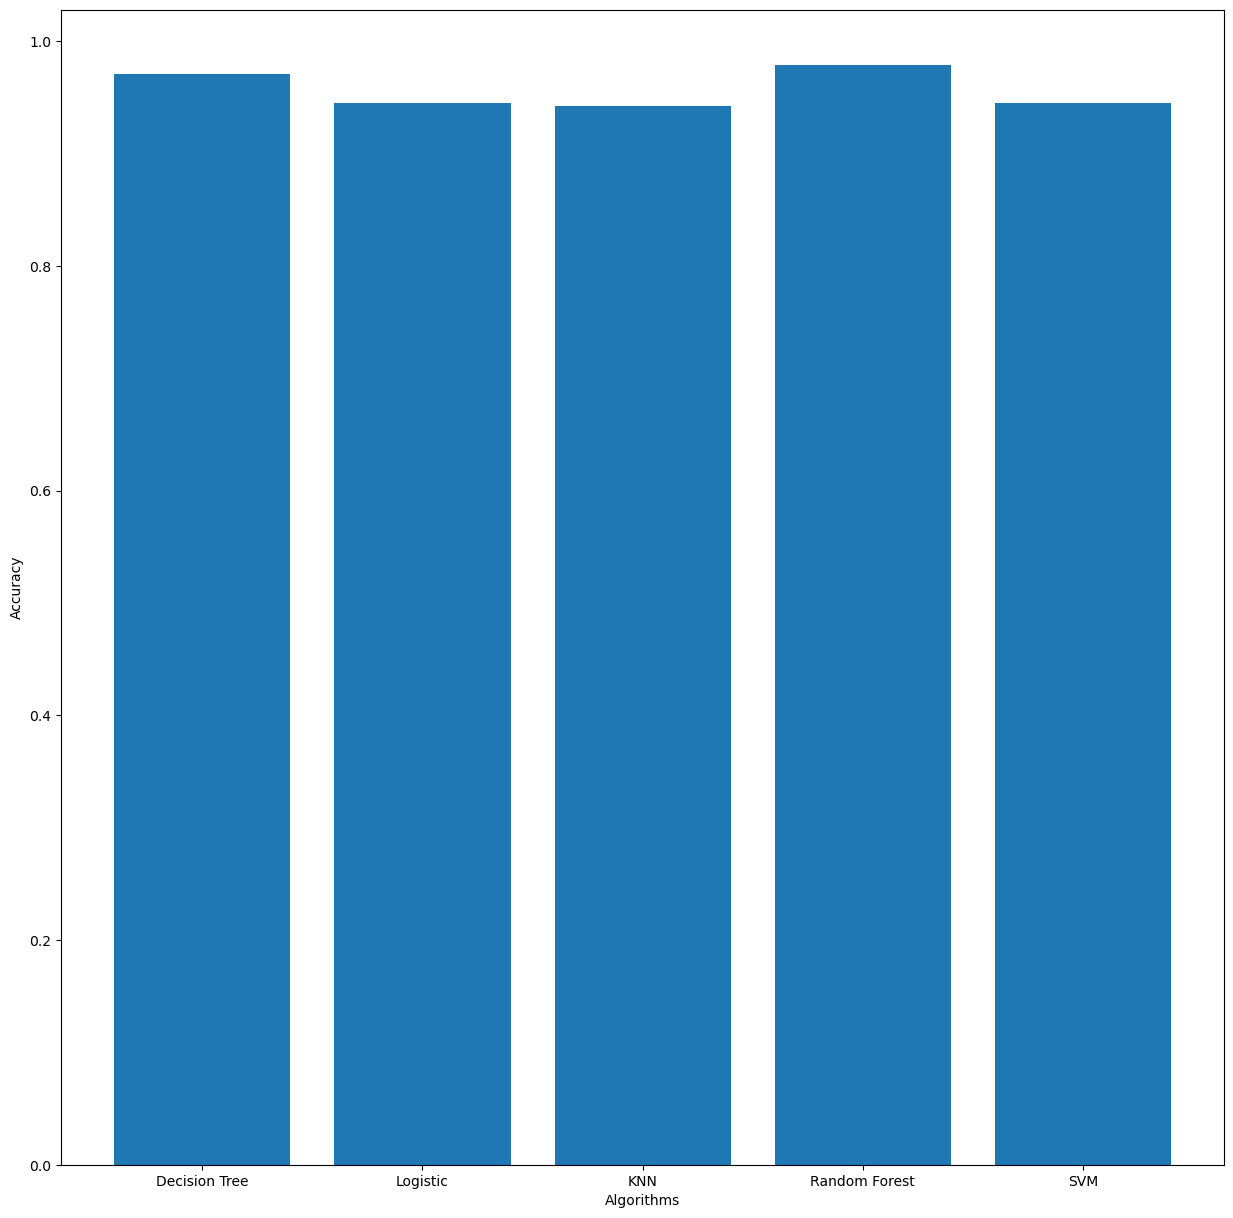

In [78]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [86]:
import pickle

# Specify the filename where you want to save the model
filename = r'C:\Users\VEDANT\OneDrive\Desktop\DSML Project\random_forest_model.pkl'

# Save the model to the file
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")

Model saved to C:\Users\VEDANT\OneDrive\Desktop\DSML Project\random_forest_model.pkl


HeatMaps

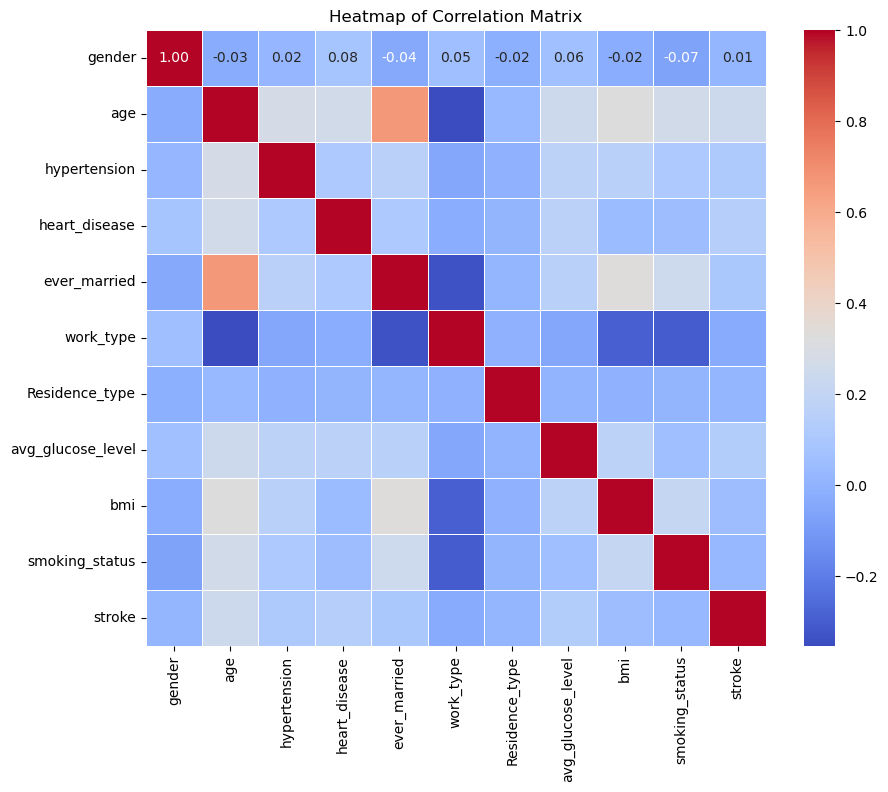

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's already loaded as 'data')
# If not, you can load it using:
# data = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is already loaded in 'data'
# Split your dataset into features (X) and target (y)
X = data.drop('stroke', axis=1)  # Features
y = data['stroke']               # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a baseline model
model = RandomForestClassifier(random_state=42)

# -----------------------------------
# 1. GridSearchCV - Exhaustive Search
# -----------------------------------

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score from GridSearchCV
print("Best GridSearchCV Params: ", grid_search.best_params_)
print("Best GridSearchCV Score: ", grid_search.best_score_)

# Evaluate on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy (GridSearchCV):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# -----------------------------------------
# 2. RandomizedSearchCV - Randomized Search
# -----------------------------------------

# Define the parameter distribution for tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score from RandomizedSearchCV
print("Best RandomizedSearchCV Params: ", random_search.best_params_)
print("Best RandomizedSearchCV Score: ", random_search.best_score_)

# Evaluate on the test data
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
print("Test Accuracy (RandomizedSearchCV):", accuracy_score(y_test, y_pred_random))
print(classification_report(y_test, y_pred_random))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best GridSearchCV Params:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GridSearchCV Score:  0.9848750000000001
Test Accuracy (GridSearchCV): 0.976
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1905
           1       0.96      0.52      0.67        95

    accuracy                           0.98      2000
   macro avg       0.97      0.76      0.83      2000
weighted avg       0.98      0.98      0.97      2000

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RandomizedSearchCV Params:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best RandomizedSearchCV Score:  0.9782499999999998
Test Accuracy (RandomizedSearchCV): 0.9725
              precision    recall  f1-score   support

           0       0.97      1.00      0.99   

Confusion Matrix

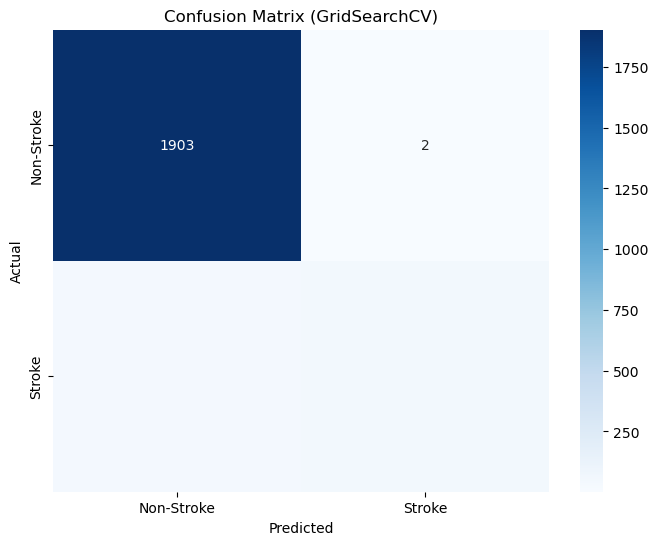

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the predictions and true labels for the test set
# Example for GridSearchCV:
y_pred = best_model.predict(X_test)  # Predictions using the best model from GridSearchCV

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Stroke', 'Stroke'], yticklabels=['Non-Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (GridSearchCV)')
plt.show()


In [92]:
y_pred_random = best_random_model.predict(X_test)
cm_random = confusion_matrix(y_test, y_pred_random)


ROC/AUC Curve

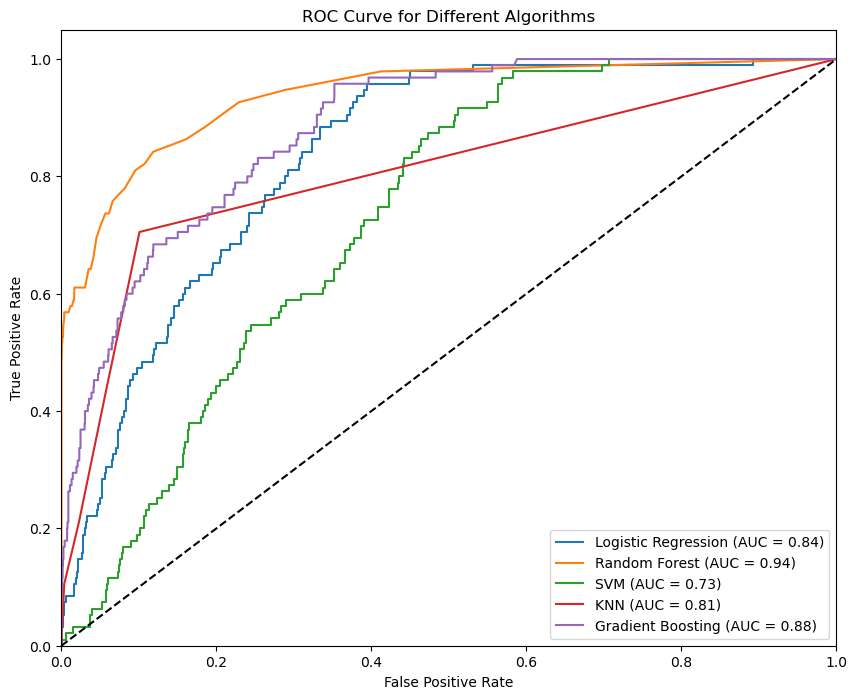

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Assuming your dataset is already loaded in 'data'
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

plt.figure(figsize=(10, 8))

# Loop through models to fit, predict, and plot ROC
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get the predicted probabilities for the positive class (stroke = 1)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Algorithms')
plt.legend(loc='lower right')
plt.show()


Data Visualisation

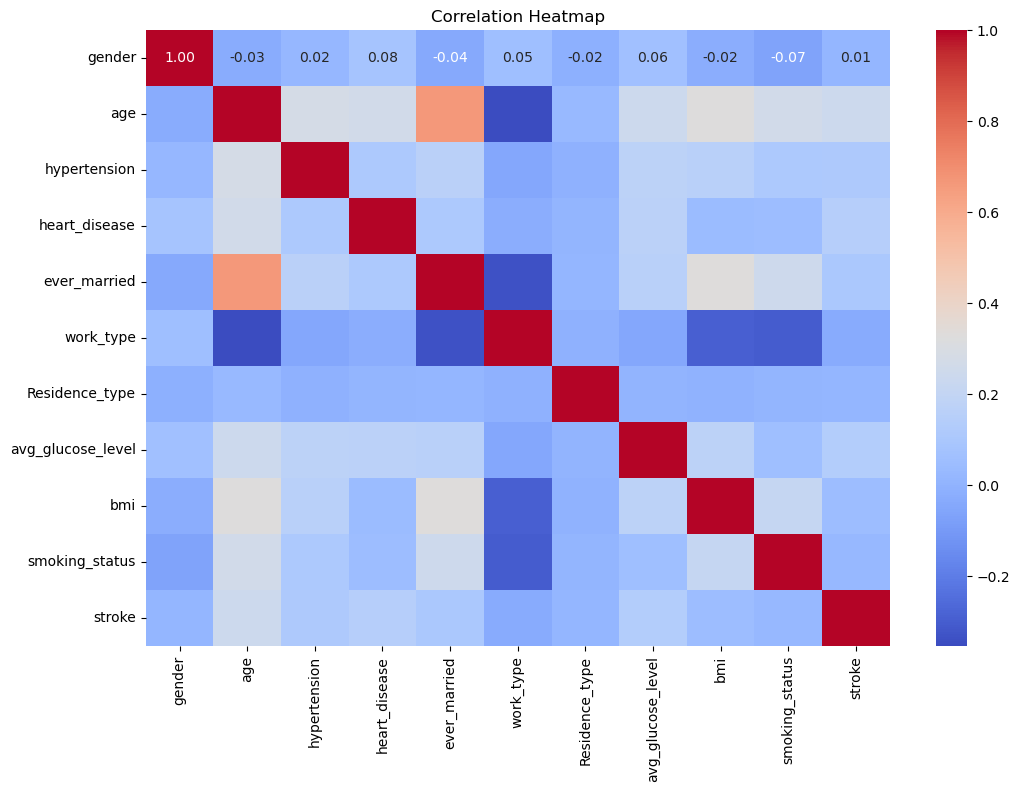

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is loaded in 'data'
# X = Features, y = Target (e.g., 'stroke')
X = data.drop('stroke', axis=1)
y = data['stroke']

# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


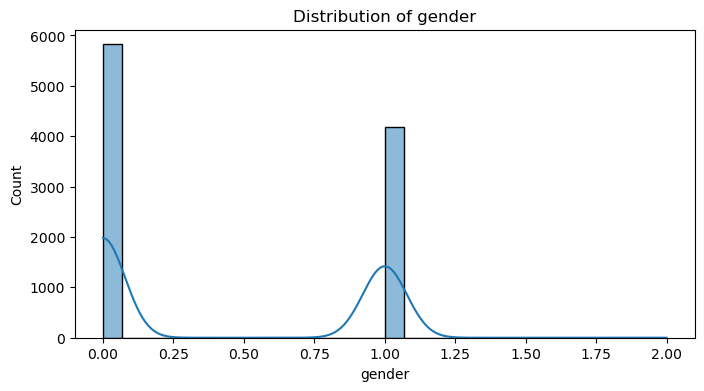

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


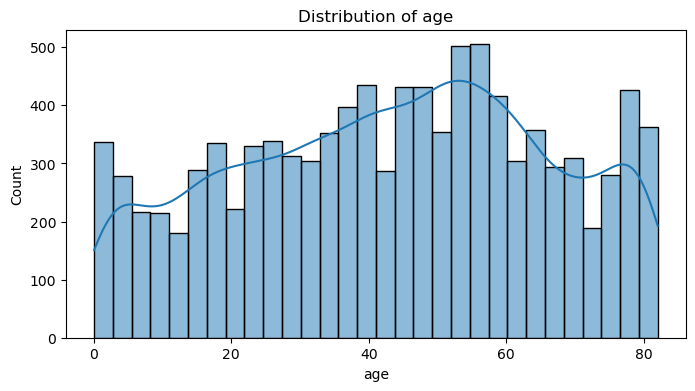

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


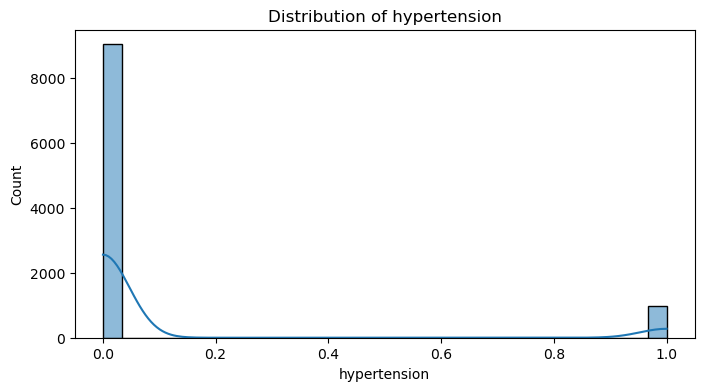

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


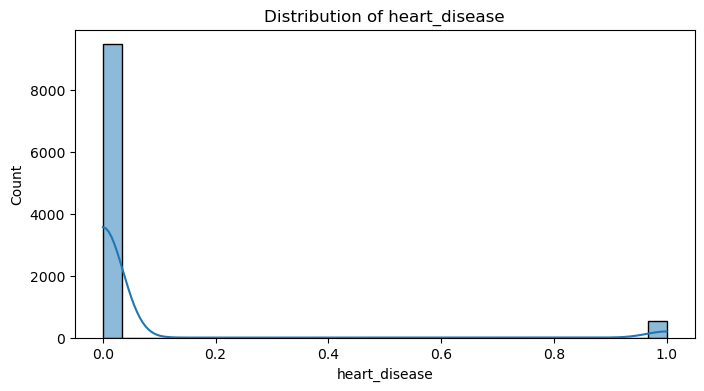

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


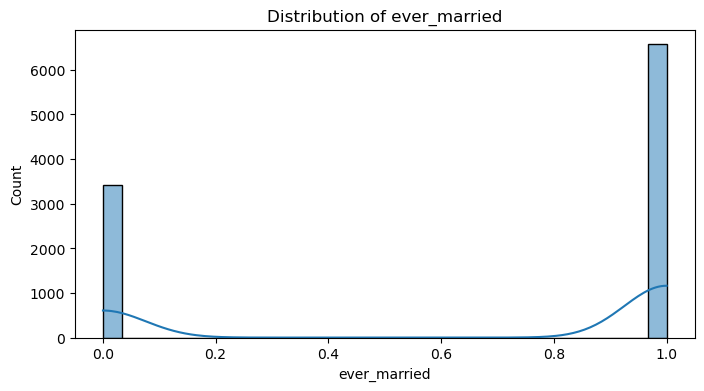

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


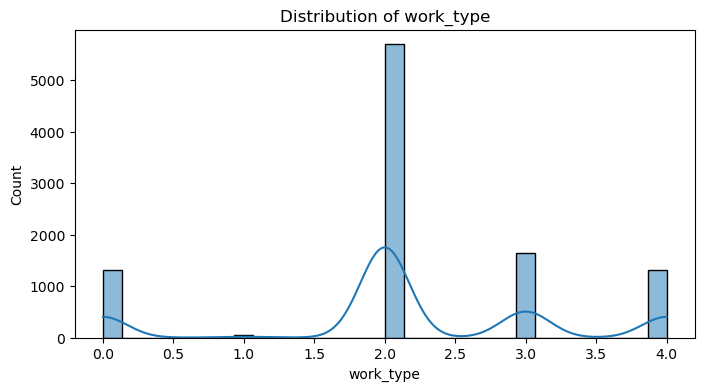

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


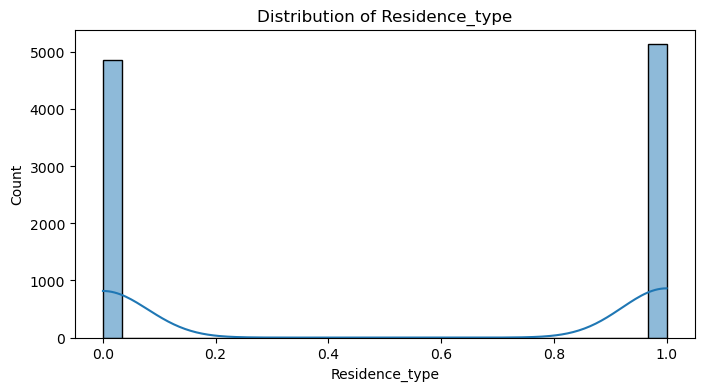

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


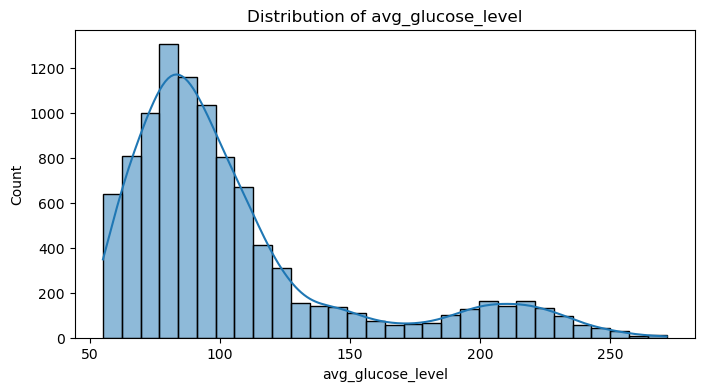

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


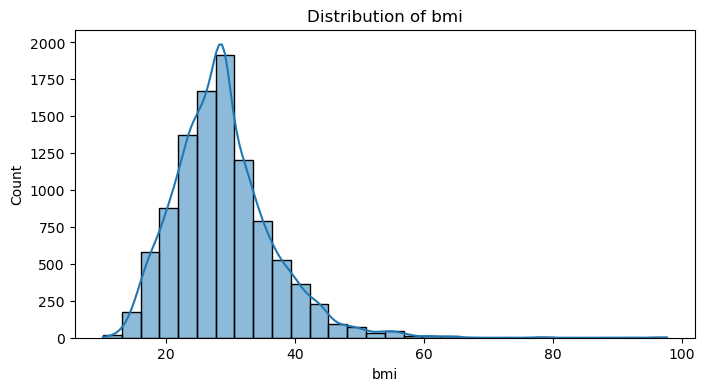

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


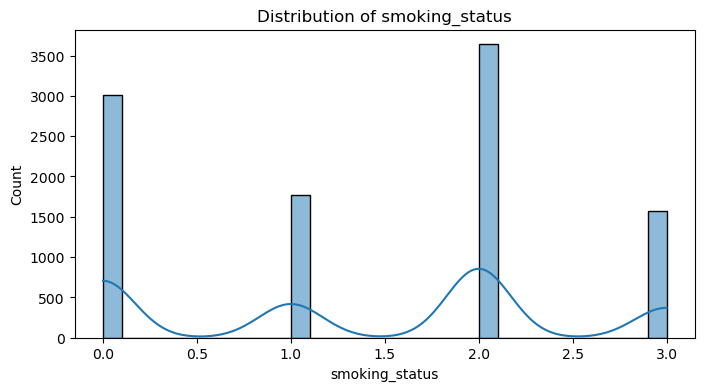

In [96]:
# 2. Distribution Plot for each feature
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


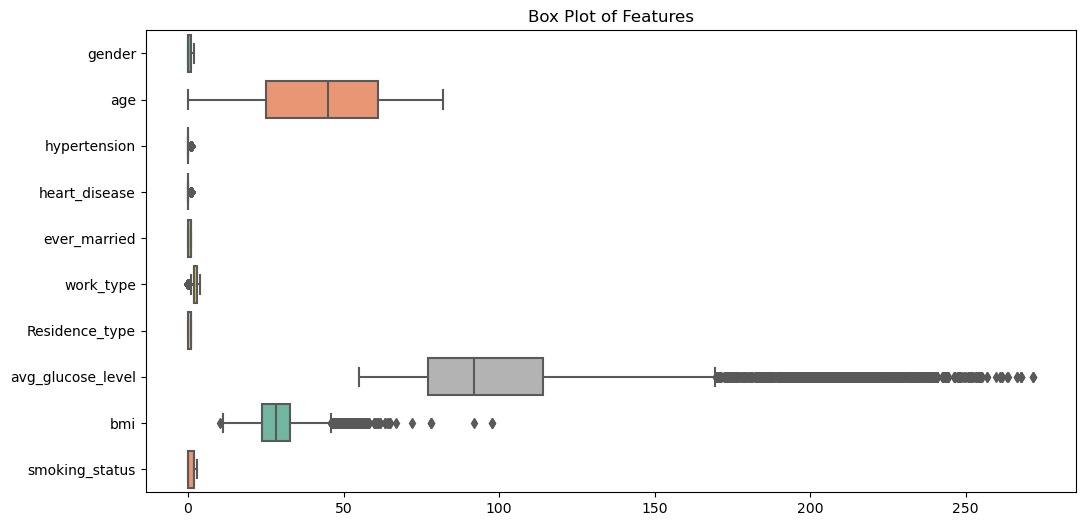

In [97]:
# 3. Box Plot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, orient='h', palette='Set2')
plt.title('Box Plot of Features')
plt.show()

C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VEDANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1000x800 with 0 Axes>

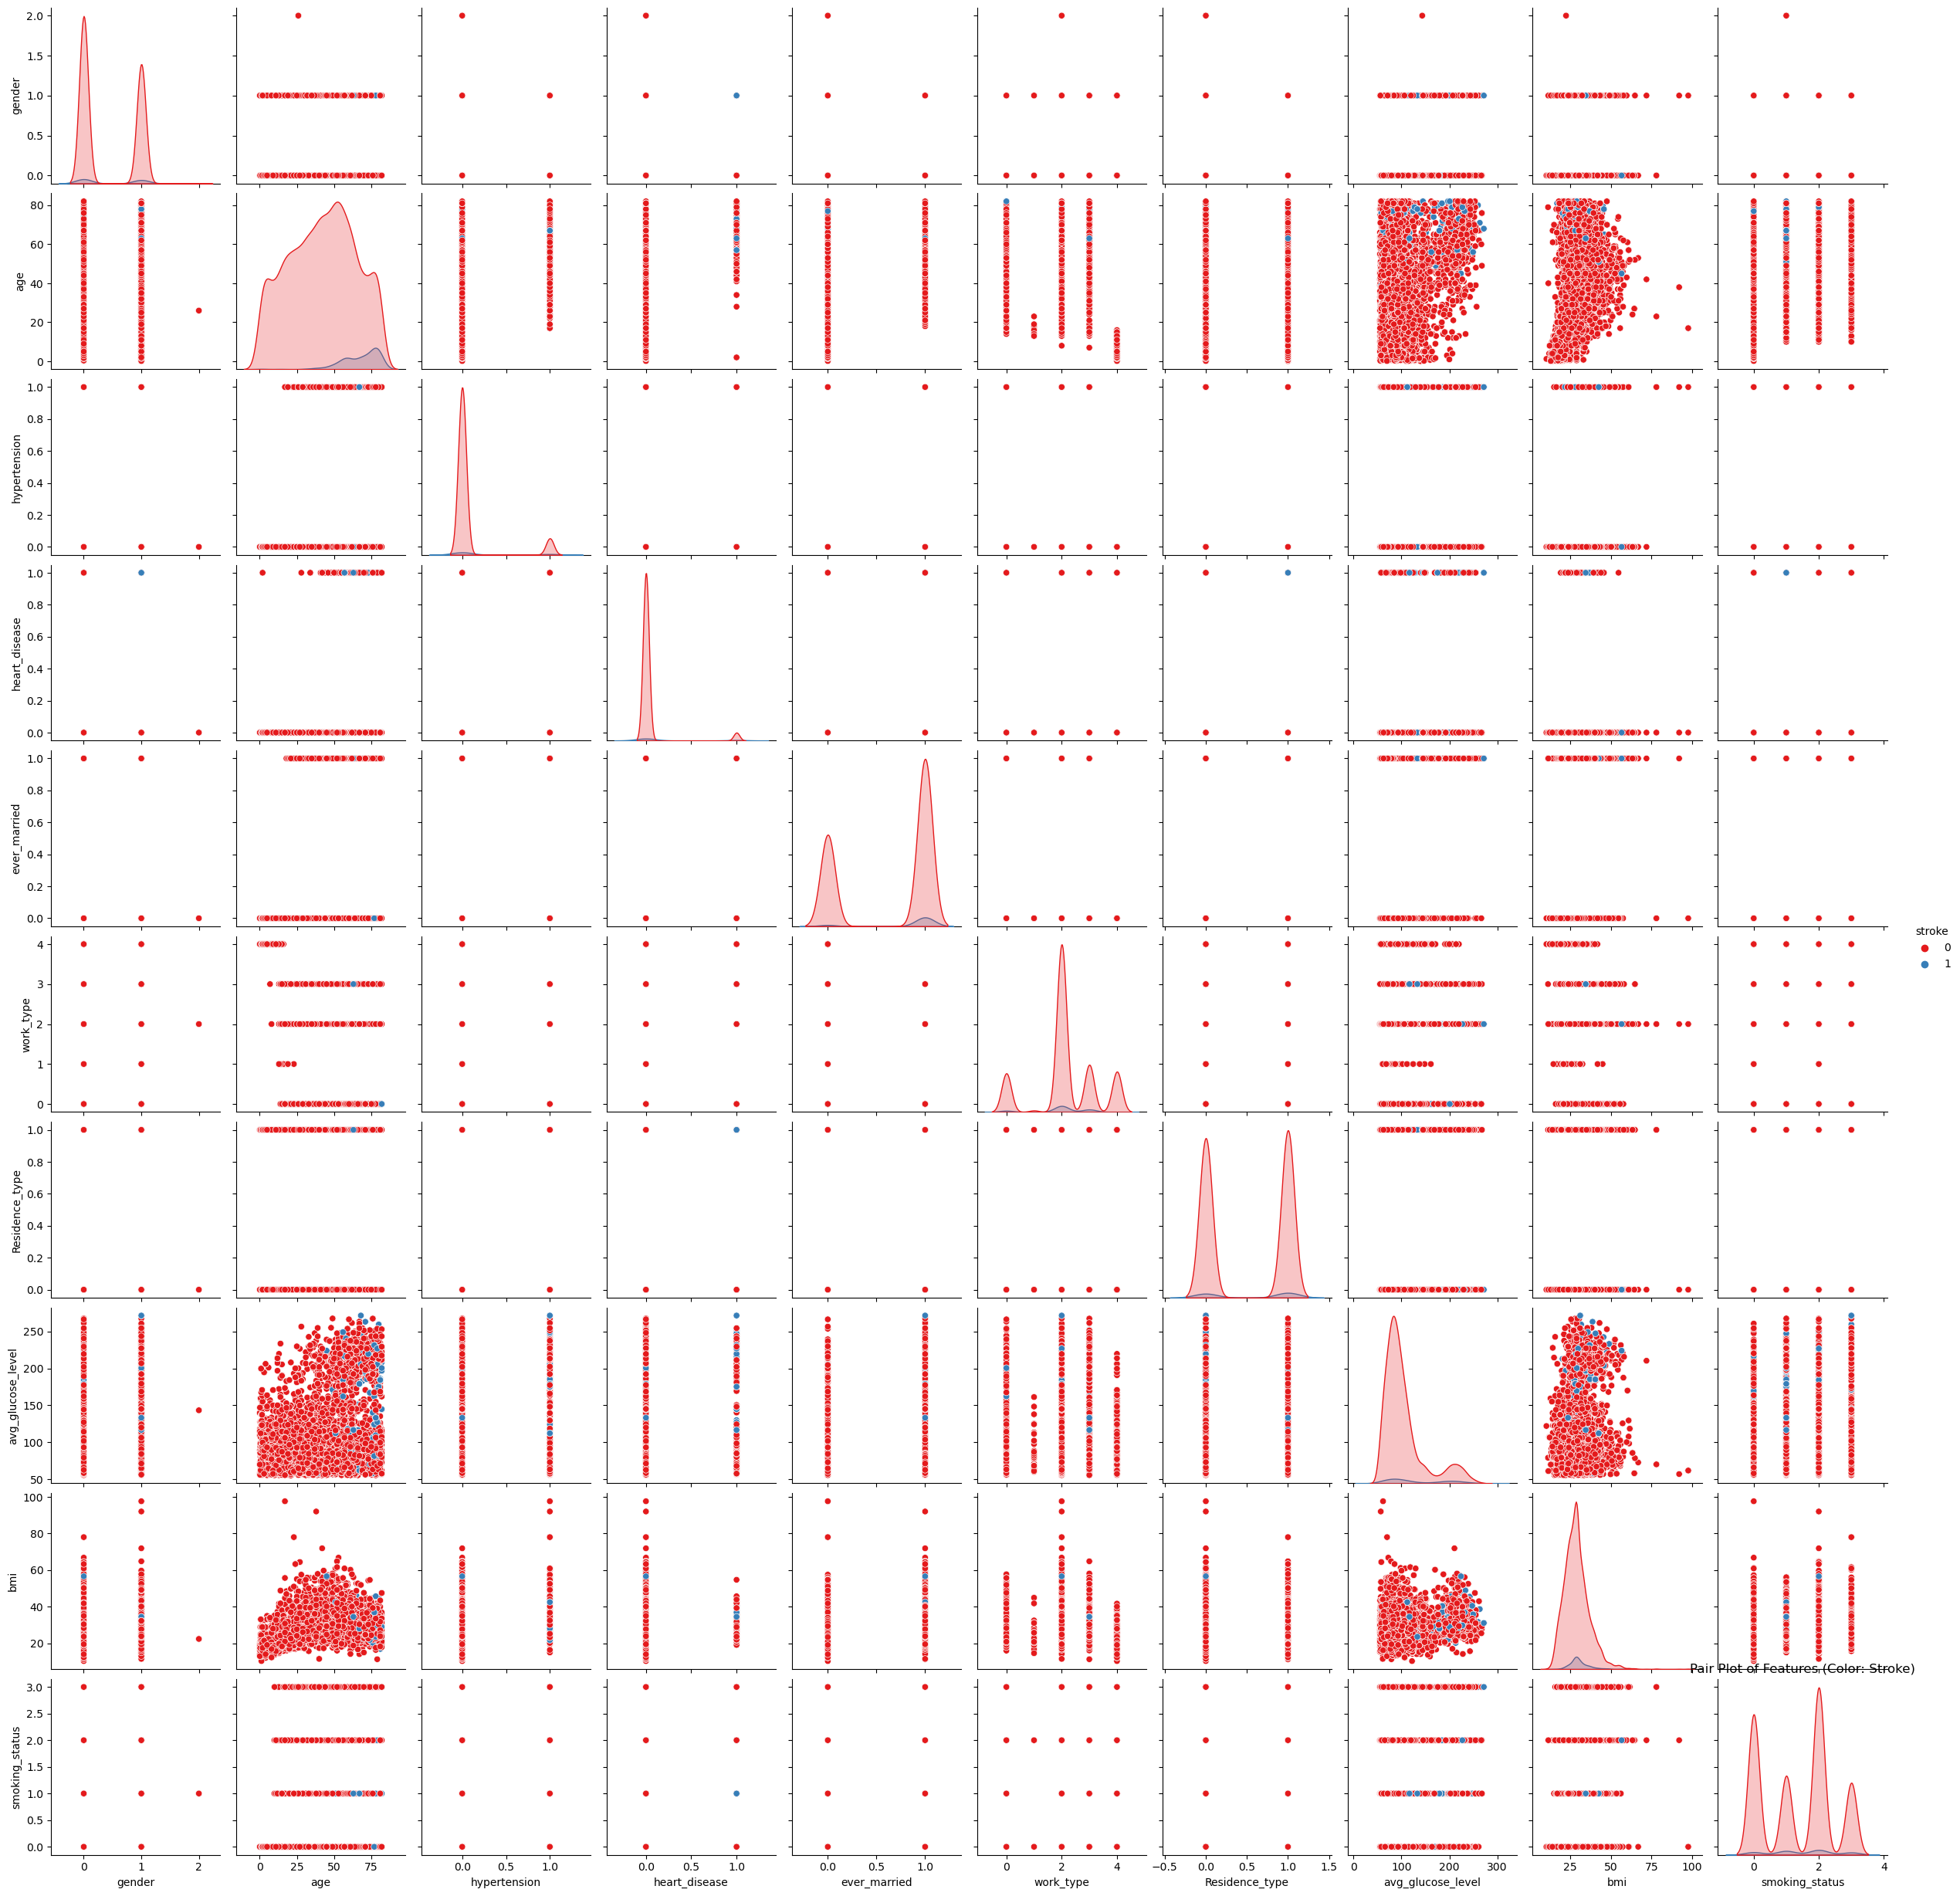

In [98]:
# 4. Pair Plot to see pairwise relationships
plt.figure(figsize=(10, 8))
sns.pairplot(data, hue='stroke', palette='Set1', diag_kind='kde')
plt.title('Pair Plot of Features (Color: Stroke)')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

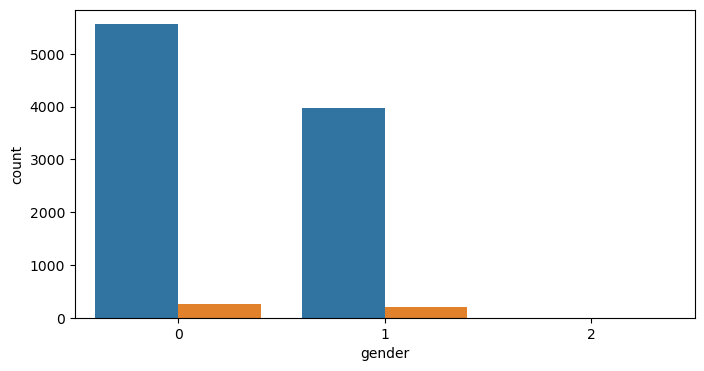

In [99]:
# 5. Count Plot for categorical data (if any categorical features exist)
# Assuming 'gender' is categorical, replace it with your feature if necessary
if 'gender' in data.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='gender', hue='stroke', data=data)
    plt.title('Count Plot of Gender by Stroke')
    plt.show()

# 6. Confusion Matrix (already covered)
# 7. ROC Curve (already covered)